In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import math

All the necessary libraries are imported

In [162]:
from google.colab import files
uploaded = files.upload()

Saving water.csv to water (2).csv


CSV file is uploaded in Google Colab


In [163]:
import io
data = pd.read_csv(io.BytesIO(uploaded['water.csv']))
data.head()

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,1,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
2,2,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
3,3,9.825490,190.756618,19677.892466,6.757541,NaN,452.836235,16.899038,47.081971,2.857472,0
4,4,5.115817,191.952743,19620.545329,6.060713,323.836384,441.748379,10.966486,49.238231,3.902089,0


The uploaded file is read using read_csv function


In [164]:
df = data

We do not want to edit the original dataset so we store the original dataset into df where we do the processing.

**Analyzing Data**

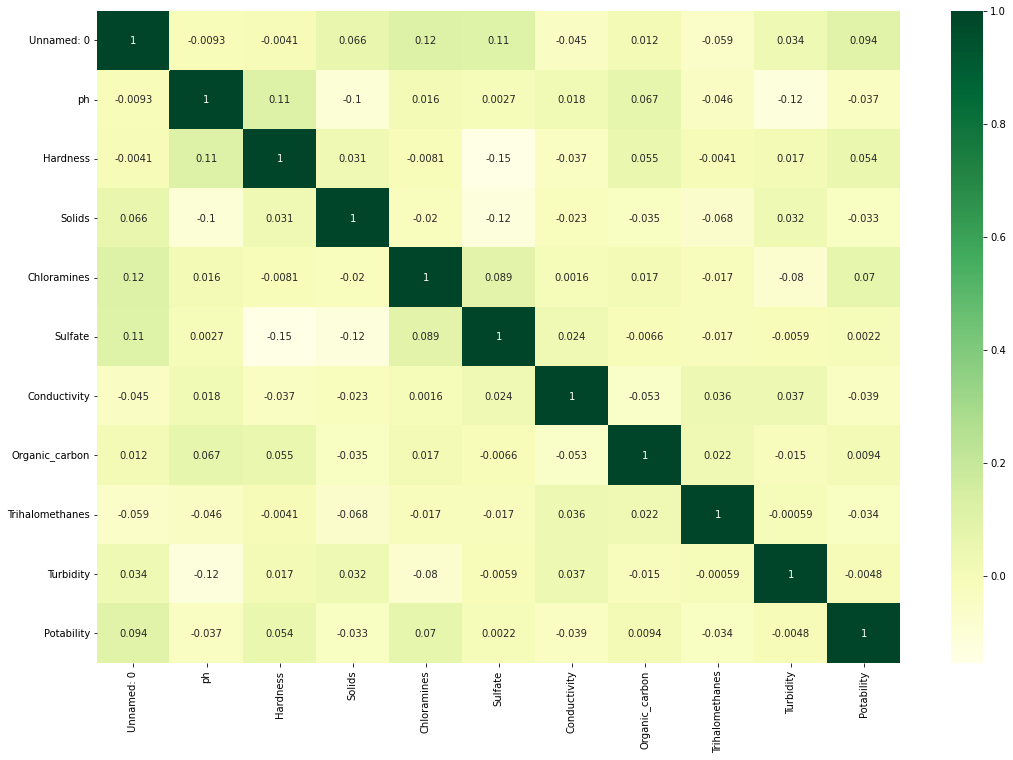

In [165]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), yticklabels='auto', annot=True, cmap='YlGn')
plt.show()

The heatmap shows the correlation of the data. The values shows the relationship betwwen the data. Higher values have high correlation.

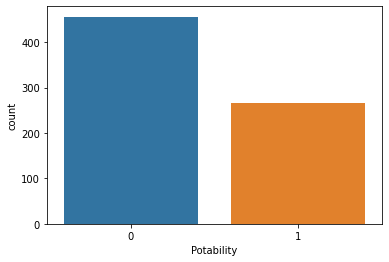

In [166]:
sns.countplot(x="Potability", data = df)

This figure shows the number of drinkable and not drinkable water quality results.

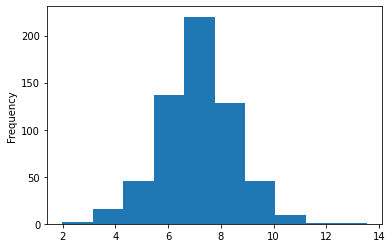

In [167]:
df['ph'].plot.hist()

This data shows the disribution of ph values.

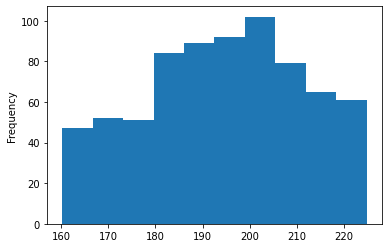

In [168]:
df['Hardness'].plot.hist()

This data shows the disribution of hardness values.

**Data Wrangling**

Data Wrangling is the process where we remove the unnecessary values and filter out the data.

In [169]:
df.isnull().sum()

Unnamed: 0           0
ph                 117
Hardness             0
Solids               0
Chloramines          0
Sulfate            181
Conductivity         0
Organic_carbon       0
Trihalomethanes     34
Turbidity            0
Potability           0
dtype: int64

The null values present in each column is shown here.

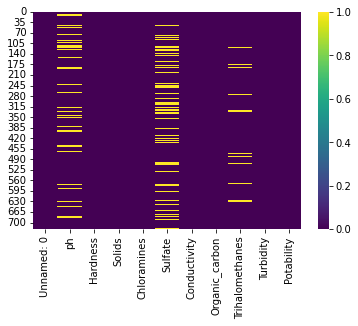

In [170]:
sns.heatmap(df.isnull(),cmap='viridis')

This is the heatmap of the null values present in the data.

In [171]:
df.head(5)

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,1,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
2,2,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
3,3,9.825490,190.756618,19677.892466,6.757541,NaN,452.836235,16.899038,47.081971,2.857472,0
4,4,5.115817,191.952743,19620.545329,6.060713,323.836384,441.748379,10.966486,49.238231,3.902089,0


In [172]:
df.dropna(subset = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability'], inplace=True)
df.drop("Unnamed: 0",axis=1,inplace = True)

All the rows containing null values are dropped using dropna.

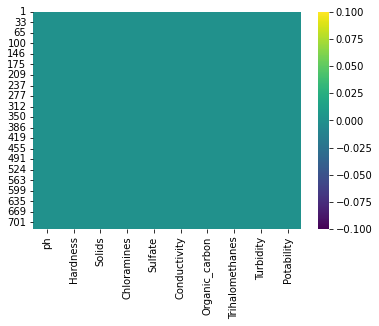

In [173]:
sns.heatmap(df.isnull(),cmap='viridis')

Here is the heatmap after the null value is dropped.

In [174]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df.ph= le.fit_transform(df.ph)
df.Hardness= le.fit_transform(df.Hardness)
df.Solids= le.fit_transform(df.Solids)
df.Chloramines= le.fit_transform(df.Chloramines)
df.Sulfate= le.fit_transform(df.Sulfate)
df.Conductivity= le.fit_transform(df.Conductivity)
df.Organic_carbon= le.fit_transform(df.Organic_carbon)
df.Trihalomethanes= le.fit_transform(df.Trihalomethanes)
df.Turbidity= le.fit_transform(df.Turbidity)


Using pre processing we convert all the values in easy form.

In [175]:
df.head(100)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,373,283,61,8,76,311,144,162,344,0
4,35,173,254,106,170,258,69,47,222,0
5,2,117,426,56,34,282,16,297,118,0
6,43,198,153,364,127,51,40,118,356,0
7,432,58,123,58,95,35,37,351,252,0
...,...,...,...,...,...,...,...,...,...,...
162,114,52,131,17,257,248,72,109,380,0
163,191,20,289,24,262,299,48,199,262,0
165,264,111,182,9,235,277,29,368,11,0
166,334,259,28,272,227,265,309,272,131,0


In [176]:
x = df.drop('Potability', axis = 1)
y = df['Potability']

The dependent and independent values are separeated.

**Training Dataset**


Dataset are split into two groups where one group trains the data set and other tests the data set.

In [177]:
from sklearn.model_selection import train_test_split


Here test size is 0.15 that means that the 15 percent of the dataset is used to test the accuracy of the linear regression.

In [178]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.15,random_state=1)

In [179]:
from sklearn.linear_model import LogisticRegression


We import linear regression and fit the training dataset in the linear regression function.

In [180]:
logmodel = LogisticRegression()

In [181]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [182]:
predictions = logmodel.predict(x_test)

This gives the predicted value after training.


In [183]:
from sklearn.metrics import classification_report


In [184]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.75      0.92      0.82        48\n           1       0.43      0.17      0.24        18\n\n    accuracy                           0.71        66\n   macro avg       0.59      0.54      0.53        66\nweighted avg       0.66      0.71      0.66        66\n'

classification report shows the accuracy of our data.

In [185]:
from sklearn.metrics import confusion_matrix

In [186]:
confusion_matrix(y_test,predictions)

array([[44,  4],
       [15,  3]])

confusion matrix shows the true negative, false positive, false negative, true positive values.

In [187]:
from sklearn .metrics import roc_auc_score
auc = roc_auc_score(y_test,predictions)
print(" AUC Score :",auc)

 AUC Score : 0.5416666666666666


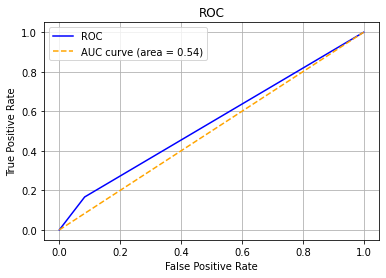

In [192]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,predictions)
plt.plot(fpr, tpr, color='blue', label='ROC')
plt.plot([0,1],[0,1],color='orange',linestyle='--',label='AUC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.grid()
plt.show()